In [16]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-wagner'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "MarketingData.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
marketing_data = pd.read_csv(file_content_stream)
marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [17]:
# Reporting the number of observations in each of the marketing channels
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

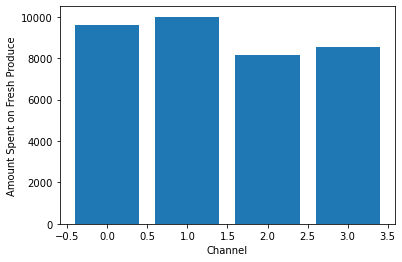

In [18]:
#creating frequency table for Fresh Produce in each channel
plt.bar('Channel','Fresh', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Fresh Produce', size = 10)
plt.show()

In [19]:
#################################################
#- From the above graph we can see that the road show was the most effective advertisment for the sales of fresh produce
# while social media was the least effective method

#################################################

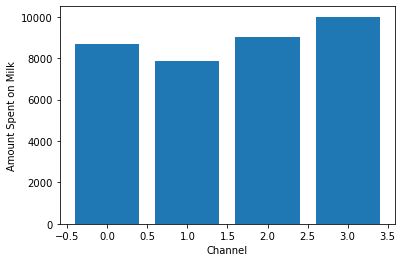

In [20]:
#creating frequency table for Milk in each channel
plt.bar('Channel','Milk', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Milk', size = 10)
plt.show()

In [ ]:
#################################################
#- From the above graph we can see that the televison was the most effective advertisment for the sales of Milk
# while Road Shows were the least effective method

#################################################

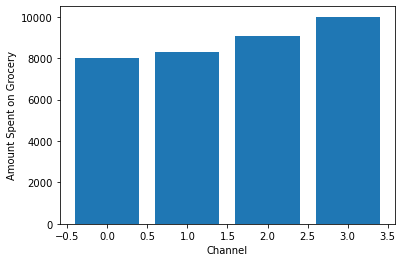

In [21]:
#creating frequency table for Grocery in each channel
plt.bar('Channel','Grocery', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Grocery', size = 10)
plt.show()

In [ ]:
#################################################
#- From the above graph we can see that the televison was the most effective advertisment for the sales of Groceries
# while Retail was the least effective method

#################################################

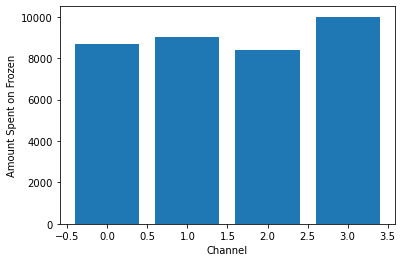

In [22]:
#creating frequency table for Frozen in each channel
plt.bar('Channel','Frozen', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Frozen', size = 10)
plt.show()

In [ ]:
#################################################
#- From the above graph we can see that the televison was the most effective advertisment for the sales of Frozen Products
# while Social Media was the least effective method

#################################################

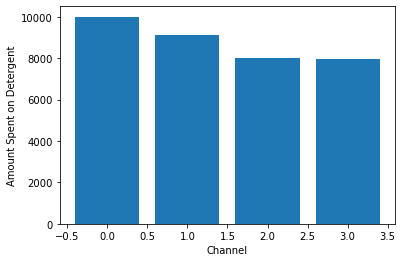

In [23]:
#creating frequency table for Detergent_Paper in each channel
plt.bar('Channel','Detergents_Paper', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Detergent', size = 10)
plt.show()

In [ ]:
#################################################
#- From the above graph we can see that the Retail was the most effective advertisment for the sales of Frozen Products
# while Television was the least effective method

#################################################

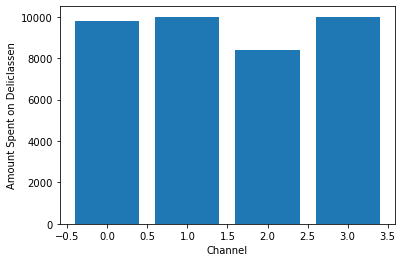

In [24]:
#creating frequency table for Delicassen in each channel
plt.bar('Channel','Delicassen', data = marketing_data)
plt.xlabel('Channel', size = 10)
plt.ylabel('Amount Spent on Deliclassen', size = 10)
plt.show()

In [ ]:
#################################################
#- From the above graph we can see that the Road Shows were the most effective advertisment for the sales of Delicassen Products
# while Social Media was the least effective method

#################################################

In [25]:
#Defining input and target variables
X = marketing_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
Y = marketing_data['Channel']

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [28]:
#Building OneVsRest Ada Boost model
one_vs_rest_Ada = OneVsRestClassifier(estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, learning_rate = 0.01)).fit(X_train, Y_train)

one_vs_rest_Ada_pred = one_vs_rest_Ada.predict(X_test)

# Computing the classification report
print(classification_report(Y_test, one_vs_rest_Ada_pred))        

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1002
           1       0.79      0.78      0.78      1000
           2       0.84      0.86      0.85       998
           3       0.85      0.86      0.85      1000

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



In [30]:
#Building OneVsOne Ada Boost model
one_vs_one_Ada = OneVsOneClassifier(estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, learning_rate = 0.01)).fit(X_train, Y_train)

one_vs_one_Ada_pred = one_vs_one_Ada.predict(X_test)

# Computing the classification report
print(classification_report(Y_test, one_vs_one_Ada_pred))       

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1002
           1       0.82      0.80      0.81      1000
           2       0.85      0.88      0.86       998
           3       0.86      0.85      0.86      1000

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



In [ ]:
#Based on the two reports above I would use the OneVsOne model as it has a higher overall precision score for all 4 channels
#and a higher accuracy overall